In [1]:
using LinearAlgebra
using Plots
import StatsBase
include("src/Trajectories.jl")
using .QuantumTrajectories
import Distributions, HypothesisTests

In [3]:
################### Qubit decay example ######################
#### 1. Create the system instance
gamma = 1.5
n = 1
gamma1 = (n+1)*gamma 
gamma2 = (n)*gamma
sigma_m = [[0.0+0im, 0]  [1, 0]]
sigma_p = [[0.0+0im, 1]  [0, 0]]
sys = System( zeros(ComplexF64, 2, 2), # Hamiltonian
    [sqrt(gamma1)*sigma_m, sqrt(gamma2)*sigma_p ]) #Jump Operators
#### 2. Create the simulation parameters instance
psi0 = zeros(ComplexF64, 2)
psi0[2] = 1 # Initial condition
simulparams = SimulParameters(psi0,
    5.0, # Final time. Set very long so that all trajectories jump
    10, # seed
    1000, # Number of trajectories
    10_000, # Number of samples in the finegrid
    10, # Multiplier to use in the fine grid
    1e-3 # Tolerance for passing Dark state test
) 
println(sys)

System(NLEVELS=2
NCHANNELS=2
H=ComplexF64[0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im]
Ls=Matrix{ComplexF64}[[0.0 + 0.0im 1.7320508075688772 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im], [0.0 + 0.0im 0.0 + 0.0im; 1.224744871391589 + 0.0im 0.0 + 0.0im]]
J=ComplexF64[1.4999999999999998 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 2.9999999999999996 + 0.0im])
Heff=ComplexF64[0.0 - 0.7499999999999999im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 1.4999999999999998im])


In [4]:
@time begin 
    data = run_trajectories(sys, simulparams)
end 

 31.787860 seconds (227.87 M allocations: 10.242 GiB, 8.64% gc time)


1000-element Vector{Main.QuantumTrajectories.Trajectory}:
 Main.QuantumTrajectories.Trajectory([0.285028502850285, 1.6051605160516051, 2.2602260226022604, 3.9403940394039405, 4.08040804080408, 4.475447544754475, 4.655465546554655, 4.675467546754676, 4.725472547254726], Vector{ComplexF64}[[1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im]], [1, 2, 1, 2, 1, 2, 1, 2, 1])
 Main.QuantumTrajectories.Trajectory([0.12501250125012503, 0.655065506550655, 0.815081508150815, 0.835083508350835, 1.035103510351035, 2.33023302330233, 2.74027402740274, 4.070407040704071, 4.185418541854186], Vector{ComplexF64}[[1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0

# Qubit Radiative Damping Test
To test this thing we will look at the following master equation:
$$ \dot{\rho} = -i\frac{\Delta\omega_a}{2}\left[\sigma_z, \rho \right] + \gamma \left( \sigma_-\rho\sigma_+ -\frac{1}{2}
\left\{\rho, \sigma_+\sigma_-\right\}\right) .$$ 
We have:

$$ L = \sqrt{\gamma}\sigma_-$$

$$ H = \frac{\Delta\omega_a}{2}\sigma_z$$

$$ H_e =\frac{\Delta\omega_a}{2}\sigma_z -  \gamma\frac{i}{2}|e\rangle \langle e | = \frac{1}{2}(\Delta\omega_a - i\gamma)|e\rangle \langle e | - \frac{\Delta\Omega_a}{2}|g\rangle\langle g|$$

$$ W(t \hspace{0.05cm}| \hspace{0.05cm} |e\rangle\langle e |) = \gamma e^{-\gamma t}$$

In [29]:
################### Data Generation
#EXAMPLE : RADIATIVE DAMPING ######################
#### 1. Create the system instance
gamma = 3
sigma_m = [[0.0+0im, 0] [1, 0]]
sys = System(zeros(ComplexF64, 2, 2), # Hamiltonian
    [sigma_m]) #Jump Operators
#### 2. Create the simulation parameters instance
psi0 = zeros(ComplexF64, 2)
psi0[2] = 1 # Initial condition
simulparams = SimulParameters(psi0,
    5.0, # Final time. Set very long so that all trajectories jump
    1, # seed
    1000, # Number of trajectories
    10_000, # Number of samples in the finegrid
    3, # Multiplier to use in the fine grid
    1e-3 # Tolerance for passing Dark state test
) 



SimulParameters(psi0=[0.0, 1.0]
nsamples=10000
seed=1
ntraj=1000)
multiplier=3.0
tf=5.0
dt=0.0015
eps=0.001)

In [45]:
using Test
EPS = 1e-5 # Tolerance for the distance respect to the Frobenious norm
deltaomega = 10.0
gamma = 3.0
sigma_z = [[1.0+0im, 0] [0, -1]]
sigma_m = [[0.0+0im, 0] [1, 0]]
H = 0.5*deltaomega * sigma_z
L = sqrt(gamma) * sigma_m
J = gamma * [[0,0] [0,1.0+0im]]
He = [[deltaomega/2, 0.0] [0.0, 0.5*(-deltaomega - 1im*gamma) ]]

psi0 = zeros(ComplexF64, 2)
psi0[2] = 1 # Initial condition

sys = System(H, # Hamiltonian
[sqrt(gamma)*sigma_m]) #Jump Operators
simulparams = SimulParameters(psi0,
    5.0, # Final time. Set very long so that all trajectories jump
    1, # seed
    10000, # Number of trajectories
    10_000, # Number of samples in the finegrid
    3, # Multiplier to use in the fine grid
    1e-3 # Tolerance for passing Dark state test
) 


@testset verbose=true "Radiative Damping Correct Operators" begin
   @test norm(sys.H - H) < EPS 
   @test norm(sys.Ls[1]- L) < EPS
   @test norm(sys.Heff- He) < EPS
   @test norm(sys.J - J ) < EPS
end;

# Data generation
data = run_trajectories(sys, simulparams)
times = [data[k].times[1] for k in 1:simulparams.ntraj]
d = Distributions.Exponential(gamma)
# Goodness of fit test for the WTD


Test Summary:                       | Pass  Total  Time
Radiative Damping Correct Operators |    4      4  0.0s


Distributions.Exponential{Float64}(θ=3.0)

In [66]:
d = Distributions.Exponential(1/gamma)

Distributions.Exponential{Float64}(θ=0.3333333333333333)

In [73]:
Distributions.fit(Distributions.Exponential, times)

Distributions.Exponential{Float64}(θ=0.33579282928292825)

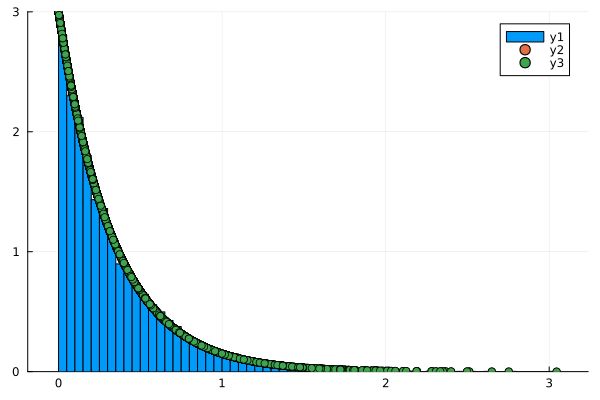

In [65]:
histogram(times, normalize=:pdf)
scatter!(times, gamma * exp.(-gamma*times))
scatter!(times, Distributions.pdf(d, times))

In [54]:
times = [data[k].times[1] for k in 1:simulparams.ntraj]

10000-element Vector{Float64}:
 0.0
 0.138013801380138
 0.642064206420642
 1.2661266126612662
 0.6000600060006
 0.09300930093009302
 0.18151815181518152
 0.12901290129012902
 0.1185118511851185
 0.2895289528952895
 0.1275127512751275
 0.054005400540054004
 0.5685568556855686
 ⋮
 0.04200420042004201
 0.8745874587458746
 0.060006000600060005
 0.3465346534653465
 1.5946594659465947
 0.17551755175517553
 0.025502550255025503
 0.39903990399039907
 0.3345334533453345
 0.1635163516351635
 0.6225622562256226
 0.22802280228022803

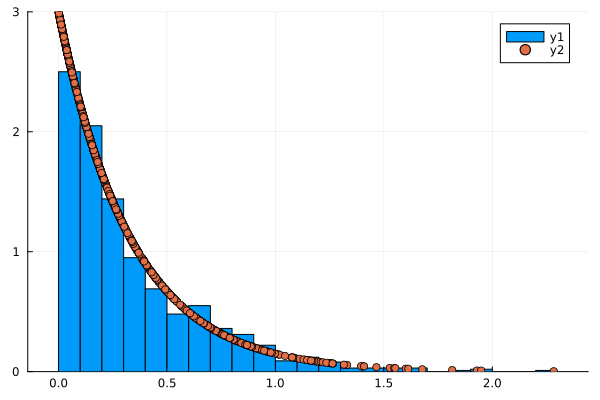

In [25]:
histogram(times, normalize=:pdf)
scatter!(times, gamma * exp.(-gamma*times) )

In [15]:
s = 0
for k in 1:simulparams.ntraj
    s = s +data[k].times[1]
end 

In [8]:
simulparams.nsamples

10000